In [1]:
from genero_nc_RMA1 import genero_nc_RMA
import pyart

In [2]:
path='~/SMN/RMA/RMA1/'
radar=genero_nc_RMA(path)

El primer archivo es: /home/martin/SMN/RMA/RMA1/RMA1_9005_01_RHOHV_20151230T001031Z.H5


In [3]:
radar.fields.keys()

['PHIDP', 'VRAD', 'RHOHV', 'CM', 'TH', 'TV', 'KDP', 'WRAD']

# ABAJO SOLO GRAFICOS

In [4]:
import pyart

#path='/home/martin/Escritorio/RMA1_ejemplo/'
#filename='cfrad.20151107_212245.0000_to_20151107_212717.0000_RMA1_SUR.nc'

#radar = pyart.io.read(path+filename)

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline

In [5]:
anio = radar.time['units'][14:18]
mes = radar.time['units'][19:21]
dia = radar.time['units'][22:24]
hora = radar.time['units'][25:27] + radar.time['units'][28:30]
elev = radar.elevation['data'][0]

radar.fields['TH']['standard_name'] = u'TH'
radar.fields['TH']['units'] = u'dBZ'

sweep=1

proyeccion='lcc'

minlon=-66.9
minlat=-33.6
maxlon=-61.7
maxlat=-29.2

m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),
           resolution=None,area_thresh=1000, projection=proyeccion,
           lat_1=-31.5,lat_0=radar.latitude['data'][0],lon_0=radar.longitude['data'][0])

inicio=radar.sweep_start_ray_index['data'][sweep]
final=radar.sweep_end_ray_index['data'][sweep]

lons, lats = m(radar.gate_longitude['data'][inicio:final], radar.gate_latitude['data'][inicio:final])

path_shapefile='/home/martin/RadarMeteo/datos/shapefiles/'

## VERSION 1, SIN PYART

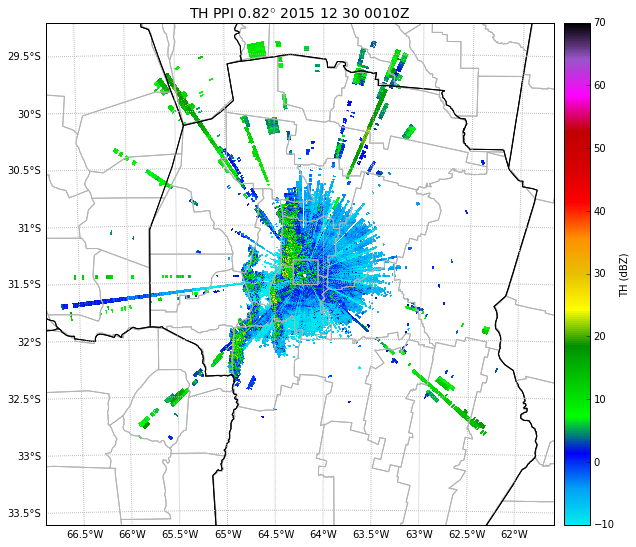

In [6]:
f = plt.figure(figsize = [11,9]);

# from matplotlib.colors import BoundaryNorm
# bounds = np.array(LISTA)
# norm = BoundaryNorm(boundaries=bounds, ncolors=256???)

im = m.pcolormesh(lons, lats, radar.fields['TH']['data'][inicio:final], shading='flat', # norm=norm
                  vmin = -10, vmax = 70, cmap=pyart.graph.cm.NWSRef)

shapefile=path_shapefile+"departamental"
m.readshapefile(shapefile,name='departamentos', color='0.7',linewidth=1)

shapefile=path_shapefile+"provincias_geog"
m.readshapefile(shapefile,name='provincia', color='k',linewidth=1)

m.drawparallels(np.linspace(-29,-34, 11), color='0.75', linewidth=1, labels=[1,0,0,0])
m.drawmeridians(np.linspace(-67,-61, 13), color='0.75', linewidth=1, labels=[0,0,0,1])

cbar = m.colorbar() # im???
cbar.set_label(radar.fields['TH'][u'standard_name']+' ('+radar.fields['TH']['units']+')')

plt.title(radar.fields['TH']['standard_name'] + ' PPI '+ str(radar.elevation['data'][(361*sweep)+1]) + r'${\degree}$ ' +
          anio + ' ' + mes + ' ' + dia + ' ' + hora + 'Z', fontsize=14)

## VERSION 2, CON PYART

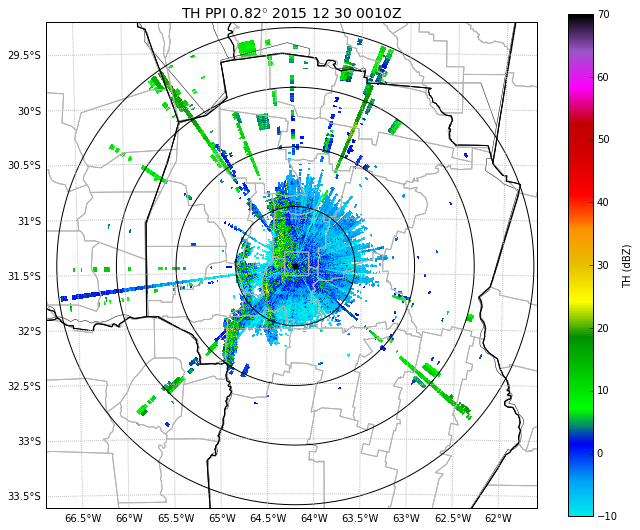

In [7]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [11,9]);

display.plot_ppi_map('TH', sweep, vmin = -10, vmax = 70, projection=proyeccion, cmap=pyart.graph.cm.NWSRef, # resolution= res
                     min_lon=minlon, max_lon=maxlon, min_lat=minlat, max_lat=maxlat),
display.plot_range_rings([60,120,180,240], ax=None, lw=1)
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color='k')

shapefile=path_shapefile+"departamental"
m.readshapefile(shapefile,name='departamentos', color='0.7',linewidth=1)

shapefile=path_shapefile+"provincias_geog"
m.readshapefile(shapefile,name='provincia', color='k',linewidth=1)

m.drawparallels(np.linspace(-29,-34, 11), color='0.75', linewidth=1, labels=[1,0,0,0])
m.drawmeridians(np.linspace(-67,-61, 13), color='0.75', linewidth=1, labels=[0,0,0,1]) 

plt.title(radar.fields['TH']['standard_name'] + ' PPI '+ str(radar.elevation['data'][(361*sweep)+1]) + r'${\degree}$ ' +
          anio + ' ' + mes + ' ' + dia + ' ' + hora + 'Z', fontsize=14);

#plt.savefig('/home/martin/Escritorio/RMA1_ejemplo/RMA1_'+radar.fields['TH']['standard_name']+'_'+str(radar.elevation['data'][(361*sweep)+1])+'_'+anio+mes+dia+'_'+hora+'Z.png',
#           dpi=150,transparent=False)